In [ ]:
# imports
import os
import torch
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import classification_report

In [19]:
def report(y_test, y_pred_labels):
    print("Classification Report:")
    print(classification_report(y_test, y_pred_labels))

In [20]:
# model analysis function
def model_analysis(model_path):
    # Load the previously trained model
    model = torch.load(os.path.join(os.getcwd(), model_path))
    model.eval()  # Ensure the model is in evaluation mode
    
    # Display the model summary
    print(model)

    # Function to show the model's structure and its parameters
    def count_params(model):
        return sum(p.numel() for p in model.parameters() if p.requires_grad)

    num_params = count_params(model)
    print(f'Number of trainable parameters: {num_params}')

    # Define transformations for images
    transform = transforms.Compose([
        transforms.ToTensor(),  # Convert images to tensors
    ])

    # Load the MNIST test dataset
    test_dataset = datasets.MNIST(root='./data', train=False, download=True, transform=transform)
    test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)

    # Evaluate the model with the test data
    correct = 0
    total = 0
    all_labels = []
    all_preds = []
    images_sample = []
    labels_sample = []
    preds_sample = []

    with torch.no_grad():  # No need to calculate gradients during evaluation
        for images, labels in test_loader:
            outputs = model(images)  # Pass the images through the model
            _, predicted = torch.max(outputs, 1)  # Get the predictions
            total += labels.size(0)  # Count the number of samples
            correct += (predicted == labels).sum().item()  # Count correct predictions

            all_labels.extend(labels.cpu().numpy())
            all_preds.extend(predicted.cpu().numpy())

            # Save some images and predictions for visualization
            if len(images_sample) < 10:
                images_sample.extend(images[:10].cpu())
                labels_sample.extend(labels[:10].cpu().numpy())
                preds_sample.extend(predicted[:10].cpu().numpy())

    # Calculate accuracy
    accuracy = correct / total
    print(f'Model accuracy on the MNIST test set: {accuracy * 100:.2f}%')

    # Accuracy plot
    fig, ax = plt.subplots(1, 1, figsize=(8, 6))
    ax.plot(all_labels[:100], all_preds[:100], 'bo', label='Predictions vs True Labels')
    ax.set_xlabel('True Labels')
    ax.set_ylabel('Predictions')
    ax.set_title('Comparison of Predictions with True Labels')
    ax.legend()
    plt.show()

    # Image with predictions plot
    fig, axes = plt.subplots(2, 5, figsize=(10, 5))
    axes = axes.ravel()
    for i in np.arange(10):
        axes[i].imshow(images_sample[i].squeeze(), cmap='gray')
        axes[i].set_title(f"True: {labels_sample[i]} Pred: {preds_sample[i]}")
        axes[i].axis('off')
    plt.show()
    
    # Classification_report
    report(all_labels, all_preds)


In [21]:
# models to analyze
model0_path = "robust/models/23_02_2025_20_22_57/participant_1_round_0_model.pth"
model4_path = "robust/models/23_02_2025_20_22_57/participant_1_round_4_model.pth"
model9_path = "robust/models/23_02_2025_20_22_57/participant_1_round_9_model.pth"

MNISTModelMLP(
  (train_metrics): MetricCollection(
    (MulticlassAccuracy): MulticlassAccuracy()
    (MulticlassPrecision): MulticlassPrecision()
    (MulticlassRecall): MulticlassRecall()
    (MulticlassF1Score): MulticlassF1Score(),
    prefix=Train/
  )
  (val_metrics): MetricCollection(
    (MulticlassAccuracy): MulticlassAccuracy()
    (MulticlassPrecision): MulticlassPrecision()
    (MulticlassRecall): MulticlassRecall()
    (MulticlassF1Score): MulticlassF1Score(),
    prefix=Validation/
  )
  (test_metrics): MetricCollection(
    (MulticlassAccuracy): MulticlassAccuracy()
    (MulticlassPrecision): MulticlassPrecision()
    (MulticlassRecall): MulticlassRecall()
    (MulticlassF1Score): MulticlassF1Score(),
    prefix=Test/
  )
  (cm): MulticlassConfusionMatrix()
  (criterion): CrossEntropyLoss()
  (l1): Linear(in_features=784, out_features=256, bias=True)
  (l2): Linear(in_features=256, out_features=128, bias=True)
  (l3): Linear(in_features=128, out_features=10, bias=True)


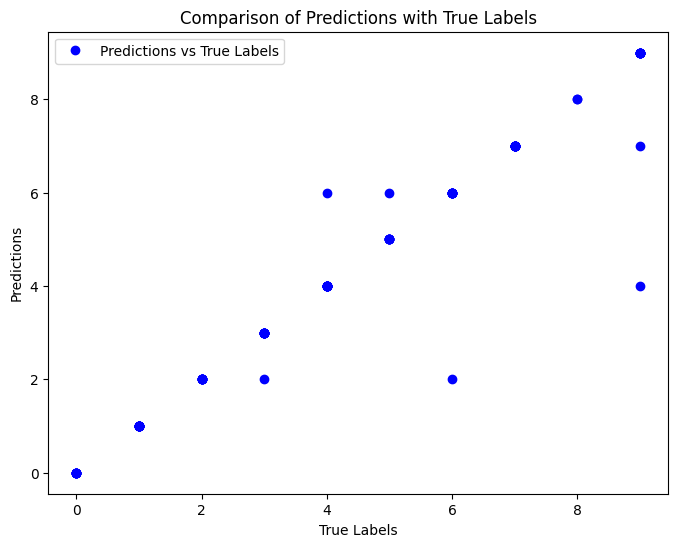

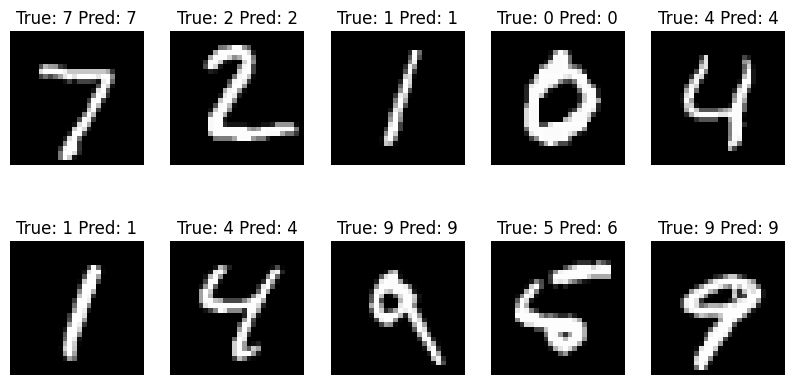

Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.99      0.96       980
           1       0.95      0.99      0.97      1135
           2       0.93      0.93      0.93      1032
           3       0.91      0.93      0.92      1010
           4       0.95      0.92      0.94       982
           5       0.97      0.84      0.90       892
           6       0.95      0.94      0.95       958
           7       0.92      0.94      0.93      1028
           8       0.89      0.93      0.91       974
           9       0.94      0.90      0.92      1009

    accuracy                           0.93     10000
   macro avg       0.93      0.93      0.93     10000
weighted avg       0.93      0.93      0.93     10000



In [22]:
# Analyze first model
model_analysis(model0_path)

MNISTModelMLP(
  (train_metrics): MetricCollection(
    (MulticlassAccuracy): MulticlassAccuracy()
    (MulticlassPrecision): MulticlassPrecision()
    (MulticlassRecall): MulticlassRecall()
    (MulticlassF1Score): MulticlassF1Score(),
    prefix=Train/
  )
  (val_metrics): MetricCollection(
    (MulticlassAccuracy): MulticlassAccuracy()
    (MulticlassPrecision): MulticlassPrecision()
    (MulticlassRecall): MulticlassRecall()
    (MulticlassF1Score): MulticlassF1Score(),
    prefix=Validation/
  )
  (test_metrics): MetricCollection(
    (MulticlassAccuracy): MulticlassAccuracy()
    (MulticlassPrecision): MulticlassPrecision()
    (MulticlassRecall): MulticlassRecall()
    (MulticlassF1Score): MulticlassF1Score(),
    prefix=Test/
  )
  (cm): MulticlassConfusionMatrix()
  (criterion): CrossEntropyLoss()
  (l1): Linear(in_features=784, out_features=256, bias=True)
  (l2): Linear(in_features=256, out_features=128, bias=True)
  (l3): Linear(in_features=128, out_features=10, bias=True)


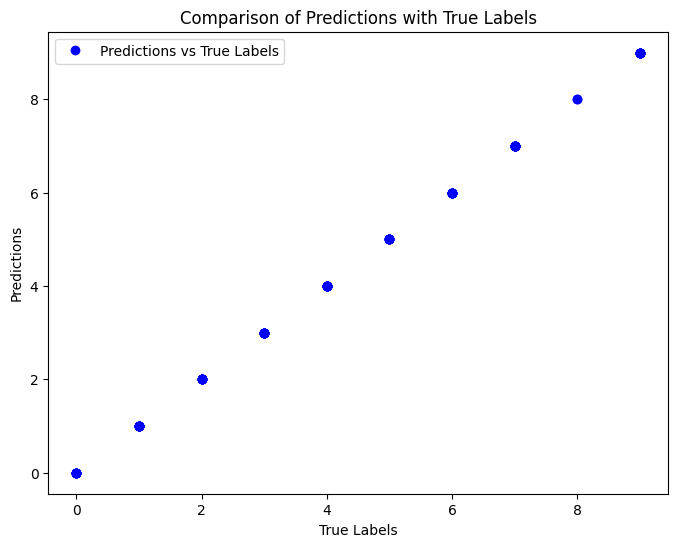

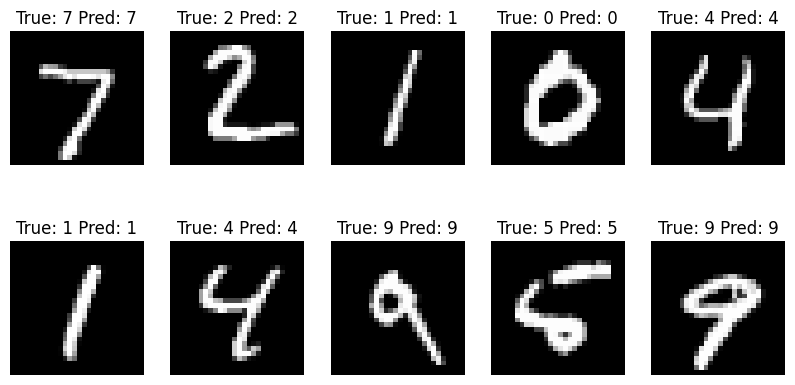

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.99      0.98       980
           1       0.99      0.99      0.99      1135
           2       0.98      0.98      0.98      1032
           3       0.97      0.98      0.97      1010
           4       0.97      0.98      0.98       982
           5       0.99      0.97      0.98       892
           6       0.97      0.98      0.98       958
           7       0.97      0.98      0.98      1028
           8       0.97      0.96      0.97       974
           9       0.98      0.96      0.97      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



In [23]:
# Analyze mid model
model_analysis(model4_path)

MNISTModelMLP(
  (train_metrics): MetricCollection(
    (MulticlassAccuracy): MulticlassAccuracy()
    (MulticlassPrecision): MulticlassPrecision()
    (MulticlassRecall): MulticlassRecall()
    (MulticlassF1Score): MulticlassF1Score(),
    prefix=Train/
  )
  (val_metrics): MetricCollection(
    (MulticlassAccuracy): MulticlassAccuracy()
    (MulticlassPrecision): MulticlassPrecision()
    (MulticlassRecall): MulticlassRecall()
    (MulticlassF1Score): MulticlassF1Score(),
    prefix=Validation/
  )
  (test_metrics): MetricCollection(
    (MulticlassAccuracy): MulticlassAccuracy()
    (MulticlassPrecision): MulticlassPrecision()
    (MulticlassRecall): MulticlassRecall()
    (MulticlassF1Score): MulticlassF1Score(),
    prefix=Test/
  )
  (cm): MulticlassConfusionMatrix()
  (criterion): CrossEntropyLoss()
  (l1): Linear(in_features=784, out_features=256, bias=True)
  (l2): Linear(in_features=256, out_features=128, bias=True)
  (l3): Linear(in_features=128, out_features=10, bias=True)


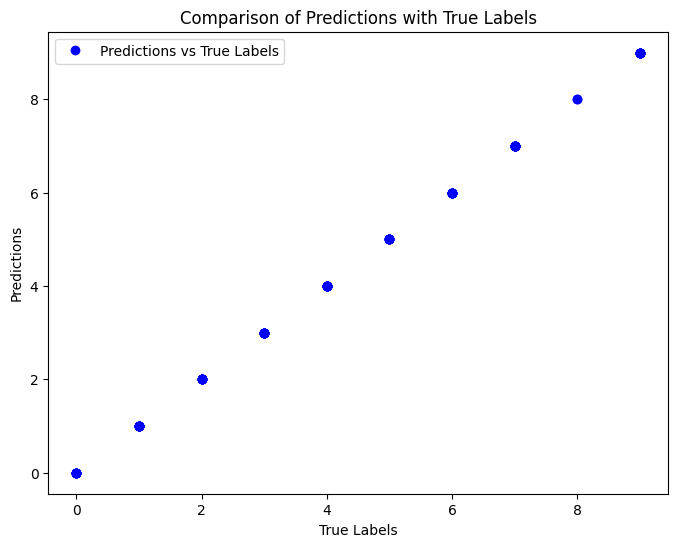

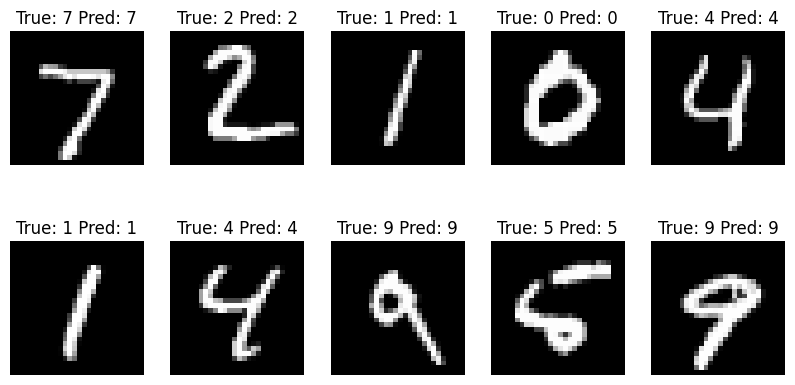

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.99      0.98       980
           1       0.99      0.99      0.99      1135
           2       0.98      0.99      0.98      1032
           3       0.98      0.98      0.98      1010
           4       0.99      0.97      0.98       982
           5       0.99      0.98      0.98       892
           6       0.99      0.98      0.98       958
           7       0.99      0.97      0.98      1028
           8       0.98      0.97      0.98       974
           9       0.96      0.98      0.97      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



In [24]:
# Analyze last model
model_analysis(model9_path)